Imports


In [44]:
from sklearn.datasets import make_circles
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Part 1

## Getting the data

In [41]:
x,y = make_circles(n_samples=500, shuffle=True, noise=0.09, random_state=5, factor=0.5)

In [42]:
fig = px.scatter(x, x=0, y=1, color=y)
fig.show()

## **Section 1:** Neural network with **no activation function**

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=5)
print("number of training examples: ", y_train.shape[0])
print("number of testing examples: ", y_test.shape[0])

number of training examples:  450
number of testing examples:  50


In [57]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(16, activation=None), 
                                    tf.keras.layers.Dense(1, activation=None)])

model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.01, momentum=0),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=8, epochs=100)

Epoch 1/100
57/57 [==============================] - 0s 1ms/step - loss: 2.3701 - accuracy: 0.4022
Epoch 2/100
57/57 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.4489
Epoch 3/100
57/57 [==============================] - 0s 1ms/step - loss: 0.6991 - accuracy: 0.5000
Epoch 4/100
57/57 [==============================] - 0s 1ms/step - loss: 0.6994 - accuracy: 0.5000
Epoch 5/100
57/57 [==============================] - 0s 1ms/step - loss: 0.7046 - accuracy: 0.4667
Epoch 6/100
57/57 [==============================] - 0s 1ms/step - loss: 0.7013 - accuracy: 0.5000
Epoch 7/100
57/57 [==============================] - 0s 1ms/step - loss: 0.7024 - accuracy: 0.4622
Epoch 8/100
57/57 [==============================] - 0s 1ms/step - loss: 0.7021 - accuracy: 0.4822
Epoch 9/100
57/57 [==============================] - 0s 1ms/step - loss: 0.7030 - accuracy: 0.4378
Epoch 10/100
57/57 [==============================] - 0s 1ms/step - loss: 0.7010 - accuracy: 0.4778
Epoch 11/

In [58]:
print("Evaluation: ")
model.evaluate(x_test, y_test)

Evaluation: 
2/2 [==============================] - 0s 4ms/step - loss: 0.7030 - accuracy: 0.4400


[0.702989935874939, 0.4399999976158142]

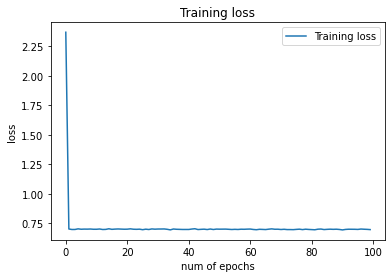

In [61]:
plt.plot(history.epoch, history.history["loss"], label='Training loss')
plt.title('Training loss')
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

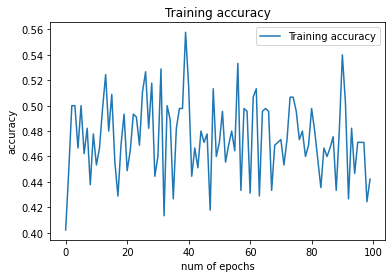

In [62]:
plt.plot(history.epoch, history.history["accuracy"], label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('num of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**نتایج**

همانطور که مشاهده می‌شود دقت مدل مقداری حدود ۴۴٪ می‌باشد که بسیار پایین است و همچنین می‌توان در نمودار دقت دید که با آموزش دادن مدل اصلا بهبودی در دقتمان حاصل نمی‌شود. همچنین loss نیز بر روی مقدار ثابتی متوقف شده است و کم نمی‌شود.
اینها به این دلیل است که از تابع فعالسازی استفاده نکرده‌ایم و مانند این است که تنها یک تابع خطی داریم و عملا شبکه‌ی عمیقمان نمی‌تواند تاثیری بگذارد.

## **Section 2:** Neural network with linear activation function

In [63]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(16, activation='linear'), 
                                    tf.keras.layers.Dense(1, activation='linear')])

model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.01, momentum=0),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=8, epochs=100)

Epoch 1/100
57/57 [==============================] - 0s 1ms/step - loss: 0.7728 - accuracy: 0.4689
Epoch 2/100
57/57 [==============================] - 0s 1ms/step - loss: 0.7058 - accuracy: 0.4333
Epoch 3/100
57/57 [==============================] - 0s 1ms/step - loss: 0.7064 - accuracy: 0.4644
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.4867
Epoch 5/100
57/57 [==============================] - 0s 1ms/step - loss: 0.7077 - accuracy: 0.4756
Epoch 6/100
57/57 [==============================] - 0s 1ms/step - loss: 0.7044 - accuracy: 0.4578
Epoch 7/100
57/57 [==============================] - 0s 1ms/step - loss: 0.7037 - accuracy: 0.4844
Epoch 8/100
57/57 [==============================] - 0s 1ms/step - loss: 0.7031 - accuracy: 0.4378
Epoch 9/100
57/57 [==============================] - 0s 1ms/step - loss: 0.7036 - accuracy: 0.4800
Epoch 10/100
57/57 [==============================] - 0s 1ms/step - loss: 0.7025 - accuracy: 0.4844
Epoch 11/

In [64]:
print("Evaluation: ")
model.evaluate(x_test, y_test)

Evaluation: 
2/2 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.4800


[0.6929324865341187, 0.47999998927116394]

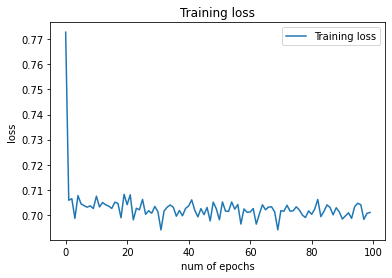

In [65]:
plt.plot(history.epoch, history.history["loss"], label='Training loss')
plt.title('Training loss')
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

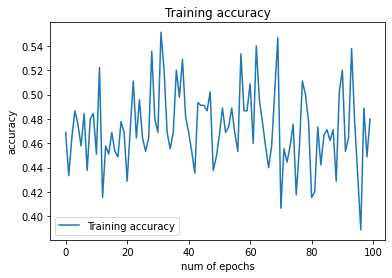

In [66]:
plt.plot(history.epoch, history.history["accuracy"], label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('num of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**نتایج**

در این حالت نیز می‌بینیم که دقتمان حدودا برابر ۴۷٪ می‌باشد و بهبودی در روند آن در طول آمورش مشاهده نمی‌کنیم. این نیز به این دلیل است که از تابع فعالسازی خطی استفاده کرده‌ایم و تابع فعالسازی خطی نیز تاثیر خوبی در عملکرد شبکه‌ی عصبیمان ندارد زیرا تبدیلی که داریم یک تبدیل خطی می‌شود.

## **Section 3:** Using a loss function which is for regression

In [71]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(16, activation='relu'), 
                                    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.01, momentum=0),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=8, epochs=100)

Epoch 1/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2449 - accuracy: 0.5044
Epoch 2/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2438 - accuracy: 0.5133
Epoch 3/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2428 - accuracy: 0.5156
Epoch 4/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2418 - accuracy: 0.5156
Epoch 5/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2408 - accuracy: 0.5111
Epoch 6/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2398 - accuracy: 0.5178
Epoch 7/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2388 - accuracy: 0.5178
Epoch 8/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2379 - accuracy: 0.5378
Epoch 9/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2369 - accuracy: 0.5400
Epoch 10/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2359 - accuracy: 0.5400
Epoch 11/

In [72]:
print("Evaluation: ")
model.evaluate(x_test, y_test)

Evaluation: 
2/2 [==============================] - 0s 4ms/step - loss: 0.1466 - accuracy: 0.9800


[0.14659568667411804, 0.9800000190734863]

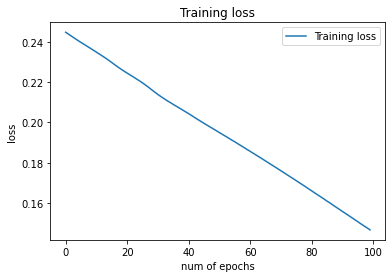

In [73]:
plt.plot(history.epoch, history.history["loss"], label='Training loss')
plt.title('Training loss')
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

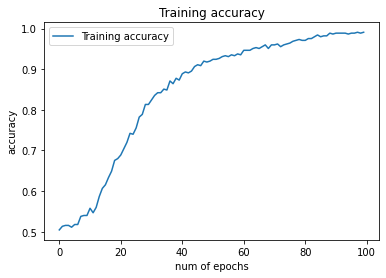

In [74]:
plt.plot(history.epoch, history.history["accuracy"], label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('num of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**نتایج**

در این حالت loss function=Mean Squared Error قرار داده شده که مختص مسائل رگرسیون می‌باشد. اما می‌توان دید که نتیجه قابل قبول است و دقتی برابر با ۹۸٪ بدست آمده و با آموزش دادن مدل طی ایپاک‌ها، دقت مدل به مرور بالا رفته است و همچنین loss آن کاهش یافته است.

## **Section 4:** Neural network with only one layer

In [79]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(4, activation='relu'), 
                                    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.01, momentum=0),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=8, epochs=100)

Epoch 1/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2949 - accuracy: 0.4644
Epoch 2/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2913 - accuracy: 0.4600
Epoch 3/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2879 - accuracy: 0.4689
Epoch 4/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2849 - accuracy: 0.4667
Epoch 5/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2824 - accuracy: 0.4667
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 0.2799 - accuracy: 0.4467
Epoch 7/100
57/57 [==============================] - 0s 2ms/step - loss: 0.2779 - accuracy: 0.4467
Epoch 8/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2760 - accuracy: 0.4378
Epoch 9/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2743 - accuracy: 0.4400
Epoch 10/100
57/57 [==============================] - 0s 2ms/step - loss: 0.2727 - accuracy: 0.4244
Epoch 11/

In [80]:
print("Evaluation: ")
model.evaluate(x_test, y_test)

Evaluation: 
2/2 [==============================] - 0s 4ms/step - loss: 0.2149 - accuracy: 0.7600


[0.21493114531040192, 0.7599999904632568]

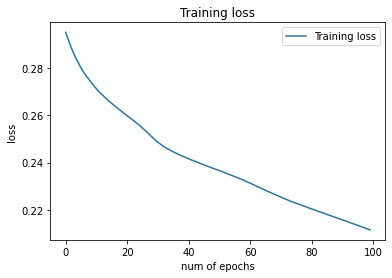

In [81]:
plt.plot(history.epoch, history.history["loss"], label='Training loss')
plt.title('Training loss')
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

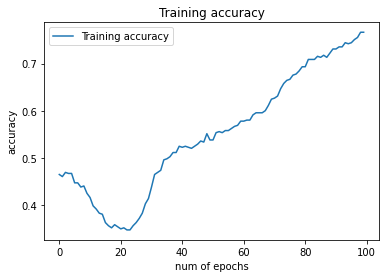

In [82]:
plt.plot(history.epoch, history.history["accuracy"], label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('num of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**نتایج**

در این حالت می‌بینیم که آموزش به خوبی صورت نگرفته و دقت نهایی مدل به ۷۵٪ رسیده‌است و دلیل آن می‌باشد که تنها از یک لایه‌ی پنهان با تعداد نورون‌های کم استفاده شده در نتیجه مدل نتوانسته است به خوبی مسئله را یاد بگیرد و دسته‌بندی را انجام دهد.

## **Section 5:** Adjusting learning rate

In [83]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(4, activation='relu'), 
                                    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.01, momentum=0),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train, 
                    batch_size=8, 
                    epochs=100,
                    callbacks=[
                      tf.keras.callbacks.LearningRateScheduler(
                        lambda epoch: 1e-3 * 10 ** (epoch / 30)
        )
    ])

Epoch 1/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2480 - accuracy: 0.4689 - lr: 0.0010
Epoch 2/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2479 - accuracy: 0.4956 - lr: 0.0011
Epoch 3/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2478 - accuracy: 0.5022 - lr: 0.0012
Epoch 4/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2477 - accuracy: 0.5000 - lr: 0.0013
Epoch 5/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2476 - accuracy: 0.5022 - lr: 0.0014
Epoch 6/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2474 - accuracy: 0.5022 - lr: 0.0015
Epoch 7/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2473 - accuracy: 0.5022 - lr: 0.0016
Epoch 8/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2471 - accuracy: 0.5089 - lr: 0.0017
Epoch 9/100
57/57 [==============================] - 0s 1ms/step - loss: 0.2469 - accuracy: 0.4956 - lr:

In [84]:
print("Evaluation: ")
model.evaluate(x_test, y_test)

Evaluation: 
2/2 [==============================] - 0s 5ms/step - loss: 0.0568 - accuracy: 0.9200


[0.05682778358459473, 0.9200000166893005]

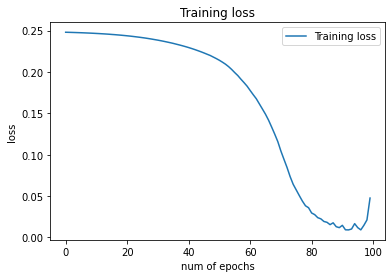

In [85]:
plt.plot(history.epoch, history.history["loss"], label='Training loss')
plt.title('Training loss')
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

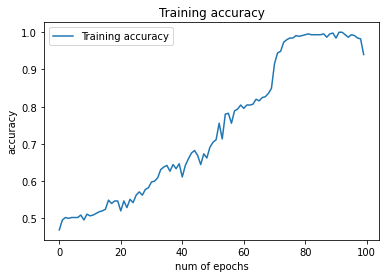

In [86]:
plt.plot(history.epoch, history.history["accuracy"], label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('num of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

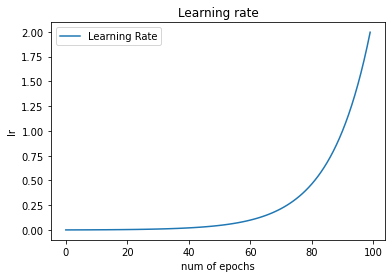

In [87]:
plt.plot(history.epoch, history.history["lr"], label='Learning Rate')
plt.title('Learning rate')
plt.xlabel('num of epochs')
plt.ylabel('lr')
plt.legend()
plt.show()

**نتایج**

در این حالت learning rate را از مقدار 0.001 تا 2 در طی ۱۰۰ ایپاک افزایش می‌دهیم.
<br>
می‌بینیم که با افزایش آن به مرور دقتمان افزایش و loss مدل کاهش می‌یابد اما در نهایت از یک مقداری به بعد هر دو معیار بهم می‌ریزد پس نمی‌توانیم بگوییم هرچه مقدار learning rate بیشتر باشد بهتر است. <br>
برای یافتن بهترین نقدار learning rate باید به نمودار training loss توجه کنیم و در جایی که مشاهده کردیم که شیب نمودار از همه بیشتر است مقدار learning rate در آن نقطه را به عنوان مقدار نهایی قرار دهیم که در اینجا می‌شود حدود ایپاک ۶۰ که learning rate = 0.1 می‌باشد.

## **Section 6:** Best neural network

In [75]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(16, activation='relu'), 
                                    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=4, epochs=200)

Epoch 1/200
113/113 [==============================] - 1s 1ms/step - loss: 0.7045 - accuracy: 0.4422
Epoch 2/200
113/113 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.4956
Epoch 3/200
113/113 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.4800
Epoch 4/200
113/113 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.5133
Epoch 5/200
113/113 [==============================] - 0s 1ms/step - loss: 0.6479 - accuracy: 0.5289
Epoch 6/200
113/113 [==============================] - 0s 1ms/step - loss: 0.6354 - accuracy: 0.5333
Epoch 7/200
113/113 [==============================] - 0s 1ms/step - loss: 0.6228 - accuracy: 0.5622
Epoch 8/200
113/113 [==============================] - 0s 1ms/step - loss: 0.6094 - accuracy: 0.5800
Epoch 9/200
113/113 [==============================] - 0s 1ms/step - loss: 0.5955 - accuracy: 0.6267
Epoch 10/200
113/113 [==============================] - 0s 1ms/step - loss: 0.5816 - accura

In [76]:
print("Evaluation: ")
model.evaluate(x_test, y_test)

Evaluation: 
2/2 [==============================] - 0s 4ms/step - loss: 0.0400 - accuracy: 0.9800


[0.03996605426073074, 0.9800000190734863]

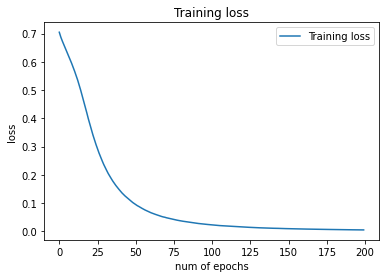

In [77]:
plt.plot(history.epoch, history.history["loss"], label='Training loss')
plt.title('Training loss')
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

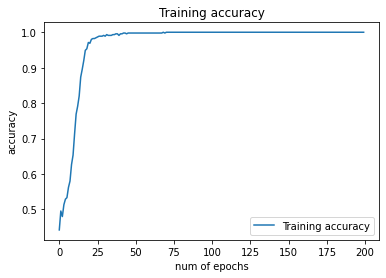

In [78]:
plt.plot(history.epoch, history.history["accuracy"], label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('num of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**نتایج**

در این حالت بهترین شبکه‌ی عصبی را برای این مسئله درست کردیم که دقتی برابر با ۹۸٪ دارد و loss آن بسیار پایین می‌باشد.

برای این بخش از بهینه‌ساز `آدام` استفاده شده که بسیار قدرتمند می‌باشد. برای تابع فعالسازی لایه‌ی پنهان آن از تابع `رلو` و برای تابع فعالسازی لایه خروجی از تابع `سیگموید` استفاده شده و تعداد لایه‌های پنهان بیشتر نشده زیرا مسئله‌مان بسیار ساده می‌باشد و با افزایش تعداد لایه‌ها و یا تعداد نورون‌ها می‌تواند خیلی راحت بیش‌برازش رخ دهد. و در همین حالت به نسبت‌ حالت‌های قبل می‌بینیم که یادگیری به خوبی انجام شده‌است.

# Part 2

Import `fashion mnist` dataset

In [157]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical

In [158]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [159]:
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

View a photo from our dataset

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

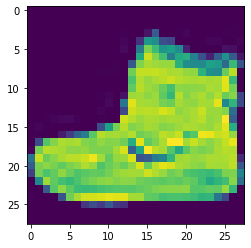

In [160]:
np.set_printoptions(linewidth=200)
plt.imshow(x_train[0])
print(y_train[0])
print(x_train[0])

In [138]:
x_train  = x_train / 255.0
x_test = x_test / 255.0

In [166]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
])

In [167]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [169]:
history = model.fit(x_train, y_train, batch_size=64, epochs=20)

Epoch 1/20
938/938 [==============================] - 53s 57ms/step - loss: 0.5209 - accuracy: 0.8074
Epoch 2/20
938/938 [==============================] - 41s 44ms/step - loss: 0.4078 - accuracy: 0.8482
Epoch 3/20
938/938 [==============================] - 45s 47ms/step - loss: 0.3648 - accuracy: 0.8652
Epoch 4/20
938/938 [==============================] - 41s 44ms/step - loss: 0.3413 - accuracy: 0.8731
Epoch 5/20
938/938 [==============================] - 39s 42ms/step - loss: 0.3200 - accuracy: 0.8796
Epoch 6/20
938/938 [==============================] - 39s 42ms/step - loss: 0.3067 - accuracy: 0.8856
Epoch 7/20
938/938 [==============================] - 39s 42ms/step - loss: 0.2941 - accuracy: 0.8899
Epoch 8/20
938/938 [==============================] - 39s 42ms/step - loss: 0.2854 - accuracy: 0.8918
Epoch 9/20
938/938 [==============================] - 39s 42ms/step - loss: 0.2746 - accuracy: 0.8969
Epoch 10/20
938/938 [==============================] - 39s 42ms/step - loss: 0.267

In [170]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2960 - accuracy: 0.8998


[0.2960115671157837, 0.8998000025749207]

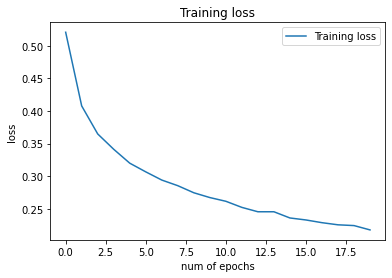

In [171]:
plt.plot(history.epoch, history.history["loss"], label='Training loss')
plt.title('Training loss')
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

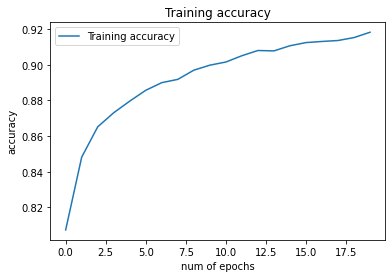

In [172]:
plt.plot(history.epoch, history.history["accuracy"], label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('num of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Confusion Matrix

In [173]:
y_pred = model.predict(x_test)

In [174]:
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

array([[814,   0,  16,  16,   3,   1, 142,   0,   8,   0],
       [  0, 976,   0,  17,   2,   1,   3,   0,   1,   0],
       [ 11,   0, 790,   6,  83,   0, 110,   0,   0,   0],
       [ 10,   3,   7, 924,  27,   0,  28,   0,   1,   0],
       [  1,   1,  47,  18, 852,   0,  81,   0,   0,   0],
       [  0,   0,   0,   0,   0, 984,   0,  13,   0,   3],
       [ 76,   0,  62,  28,  62,   0, 764,   1,   7,   0],
       [  0,   0,   0,   0,   0,   7,   0, 984,   0,   9],
       [  1,   0,   5,   6,   3,   5,   8,   2, 969,   1],
       [  1,   0,   0,   0,   0,   5,   0,  53,   0, 941]])